# Библиотеки

In [1]:
import pandas as pd
from IPython.display import Image

In [2]:
import math

import numpy as np; np.random.seed(13)
import matplotlib.pyplot as plt

In [3]:
import statistics
import seaborn as sns
import statsmodels.api as sm

import statsmodels.formula.api as smf

from scipy import stats
from numpy import random

In [4]:
import plotly.express as px
import plotly.graph_objects as go

#  Введение

**Основные понятия** 
- **Генеральная совокупность** – множество всех объектов, относительно которых делаются выводы в рамках исследования.
- **Выборка** – часть генеральной совокупности элементов, модель генеральной совокупности, которая охватывается экспериментом (наблюдением, опросом).
- **Репрезентативная выборка** – это такая выборка, в которой все основные признаки генеральной
совокупности, из которой извлечена данная выборка, представлены приблизительно в той же пропорции
или с той же частотой, с которой данный признак выступает в этой генеральной совокупности.

**Способы репрезентативной выборки:**
- Простая случайная выборка (simple random sample)
- Стратифицированная выборка (stratified sample) – разделение генеральной совокупности на различные по своей природе страты (группы), а затем случайный отбор из каждой страты.
- Групповая выборка (cluster sample) – генералная совокупность состит из похожих групр.при формирирвоании выборки выбирают любую (любые) группы, а затем из них делается случайная выборка (например, районы одного города)

**Примеры**

*simple random sample*. Для того чтобы протестировать курс по введению в статистику и выяснить, насколько хорошо с ним справятся студенты Института биоинформатики, случайным образом было выбрано 50 студентов института.

*stratified sample*. Для исследования взаимосвязи риска развития заболевания и группы крови человека потенциальных участников исследования разделили на четыре группы (в соответствии с группой крови). Затем из каждой группы случайным образом извлекли по 50 человек.

*cluster sample*. Чтобы проверить знания школьников Санкт-Петерубрга по математике, было организовано исследование. Случайным образом было выбрано 10 школ, затем из каждой школы случайным образом было отобрано по 50 учащихся разных классов.

<div class="alert alert-warning">
<h2> Типы переменных. Количественные и номинативные переменные </h2>

</div>

**Типы переменных:**
- Количественные – измеряемое (например, рост):
    - Непрерывные – переменная принимает любое значение на опр. промежутке [4, 50]; Цифры имеют матемический смысл. 
    - Дискретные – только определенные значения (1,2,34 ). Цифры имеют матемический смысла. 
- Номинативные (= качественные) – разделение испытуемых на группы, цифры как маркеры (например: 1 -женщины, 2 – мужчины). Цифры не имеют матемического смысла. 
- Ранговые – похоже на номинативные, только возможны сравнения (быстрее/медленнее и т.п.)


<div class="alert alert-warning">
<h2> Меры центральной тенденции </h2> 
</div>

Мера центральной тенденции — число, служащее для описания множества значений одним-единственным числом (для краткости).

### Мода (mode)

**Мода (mode)** – значение измеряемого признака, которое встречается максимально часто. График Dot Plot (точечный график) поможет найти моду

In [5]:
n = 100

data = np.random.randint(0, n, size=72)

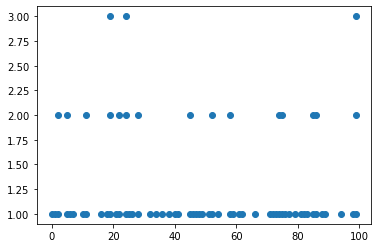

In [6]:
# функция, котоая строит график и выводит моду
pos = [] 
keys = {} # this dict will help to keep track ...

# this loop will give us a list of frequencies to each number
for num in data: 
    if num not in keys:
        keys[num] = 1
        pos.append(1)
    else:
        keys[num] += 1
        pos.append(keys[num])

plt.scatter(data, pos)
plt.show()

In [7]:
#функция которая счиатет кол-во вхождений в словарь

# fucntion which get all key with  certain value
def get_key(d, value):
    box_of_keys = []
    for k, v in d.items():
        if v == value:
            box_of_keys.append(k)
    box_of_keys.sort()
    return box_of_keys

In [8]:
# итоговые моды
get_key(keys,
         max(keys.values()))

[19, 24, 99]

In [9]:
### реализация через scipy
# If there is more than one such value, only the smallest is returned.
print(stats.mode(data)[0][0])


19


###  Медиана (median)

**Медиана (median)** – значение признака, которое делит упорядоченное множество данных пополам. Если в середине 2 значения оказываются в случае с как с четными числами, то находится среднее значение этих двух цифр (суммируются цифры и делятся на 2);

In [10]:
# функция, которая возврашает медиану 
def calculate_median(array):
    array = sorted(array)
    average_of_array = len(array)//2
    if len(array)%2 == 0:
        median = (array[average_of_array-1]+array[average_of_array])/2
    else:
        median = array[average_of_array]
    return median

calculate_median(data)

47.5

In [11]:
# The numpy median function helps in finding the middle value of a sorted array.
np.median(data)

47.5

### Среднее значение (mean) 

**Среднее значение (mean)** – сумма всех значений измеренного признака делится на количество измеренных значений. (переменная = «Х» с черточкой «-» вверху используется для среднего значения из выборки, а для генеральной совокупности латинская буква М).
- Мера вариативности - то как признак меняется относительно центральной тендеции

In [12]:
#python:
def mean_(y):
    return sum(y)/len(y)

mean_(data)

48.18055555555556

In [13]:
#Arithmetic mean is the sum of the elements along the axis divided by the number of elements.
np.mean(data)
np.average(data)

48.18055555555556

**Средневвешенное** -  математическое понятие, обобщающее среднее арифметическое. Среднее арифметическое взвешенное набора чисел ${\displaystyle x_{1},\ldots ,x_{n}}x_{1},\ldots ,x_{n}$ с весами ${\displaystyle w_{1},\ldots ,w_{n}}w_{1},\ldots ,w_{n} $

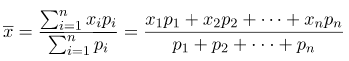

In [14]:
# Подход 1

Image(filename='фото//output1.png')

$\mu$ - обознаечени среднего в генеральной совокупности

In [15]:
# средневвешенное  нужно передать веса (в данном пример)
np.average(data,
           weights=data[::-1]*10)

49.37618910348804

**Примеры использования**

- Если распределение симметрично, унимодально и не имеет заметных выбросов: можно использовать любую из мер центральной тенденции и среднее, и мода, и медиана дадут примерно одинаковое значение.
- Если распределение с явно выраженной асимметрией (скошено либо влево/вправо), заметные выбросы или несколько мод: использование среднего нерелевантно, лучше или моду или медиану, чтобы охарактеризовать наши данные с точки зрения выраженности некоторого количественного признака.

### Свойства среднего

$ М_{x+c} = М_x + с$ (если к каждому значению некоторого распредления прибавить константу, то и среднее сдвинется на эту константу)

$ М_{x*c} = М_x*c $ (если каждое значению некоторого распредления умножим на константу, то и среднее увеличиться в эту константу)

$\sum\limits_{i=1}^n (x_{i} - \mu)^2  = 0 $  (половина значений имеет положительное отклонение нивилируется другой половиной, которая меньше 0)


$$M_{x + c} = \frac{\sum_{i=1}^{n}{(x_{i} + c)}}{n} = \frac{\sum_{i=1}^{n} x_{i}}{n} + \frac{\sum_{i=1}^{n} c}{n} = M_{x} + \frac{nc}{n} = M_{x} + c$$

$$M_{x * c} = \frac{\sum_{i=1}^{n}{(x_{i} * c)}}{n} = \frac{c * \sum_{i=1}^{n} x_{i}}{n} = c * M_{x}$$

$$\sum_{i=1}^{n} (x_{i} - M_{x}) = nM_{x} - nM_{x} = 0$$

<div class="alert alert-warning">
<h2> Меры изменчивости </h2>
</div>

### Размах

**Размах** - расстояние, в пределах которого изменяются оценки, и обозначается буквой $R = X_{(n)} - X_{(1)}$, разность между максимальным и минимальным значениями ряда.  

### Дисперсия 

**Дисперсия** - средний квадрат отклонений индивидуальных значений признака от их средней величины.

- **Дисперсия генеральной совокупности**: 
$$D = \frac{\sum_{i=1}^{n} (x_{i} - M_{x})^2}{n}$$
- **Дисперсия выборки**:
$$D = \frac{\sum_{i=1}^{n} (x_{i} - M_{x})^2}{n-1}$$

${n-1}$ - это поправка на то, что в  выборке разброс всегда будет меньше, чем во всей популяции

In [16]:
# дисперсия выборки
def sd(list_):
    deviation_sum_of_data = 0
    mean_ = np.mean(list_)
    for x_i in list_:
        deviation_sum_of_data += (x_i - mean_)**2
    return deviation_sum_of_data  / (len(list_) - 1)
sd(data)

901.1077856025036

In [17]:
# готовая формула
statistics.variance(data)

901

### Среднеквадратическое отклонение

**Среднеквадратическое отклонение** - наиболее распространённый показатель рассеивания значений случайной величины относительно её математического ожидания (средней величины).

$\sigma = \sqrt{D}$ D  из генеральной совокупности

$sd = \sqrt{D}$ Тут D из выборки.

In [18]:
# usual realisation
sd(data)**.5

30.018457415438647

In [19]:
# built in function
statistics.stdev(data)

30.01666203960727

### Свойства дисперсии и стандартного отклонения

$ D_{x+c} = D_x $ (если прибавляется произвольное число, то среднее меняется, но сама форма распределения осталась прежней

$ sd_{x+c} = sd_{x} $

$ D_{x*c} = D_x*c^2 $ (если каждое значение признака умножается на констату, то новое распределение становится более широким/ узким, а занчит стандартное отклонение увеличится в эту константу, а дисперсия  - это квадрат от стандартного отклонения, поэтому получится квадрат)

$ sd_{x*c} = sd_{x}*C $

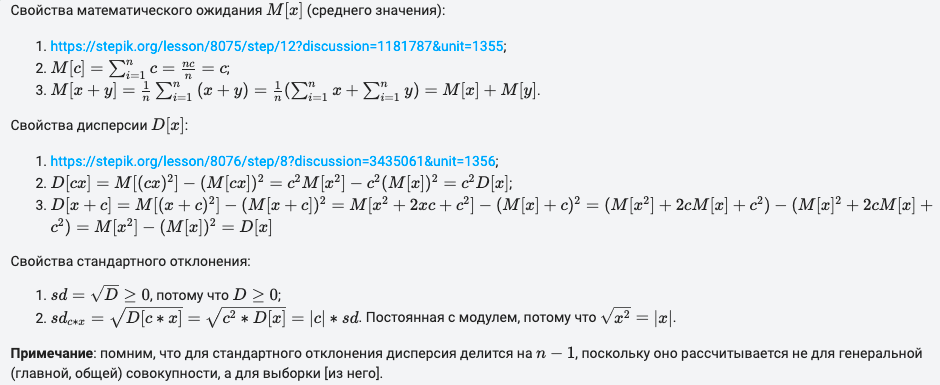

In [20]:
Image(filename='фото//output3.png')

<div class="alert alert-warning">
<h2> Квартили распределения и график box-plot </h2>
</div>

**Квантиль** – значение, которое заданная случайная величина не превышает с фиксированной вероятностью: P(X ≤ xα) ≥ α

**Квартили** – три значения признака, которые делят упорядоченное множество данных на четыре равные части.

Box plot (ящик с усамми) - вид диаграммы, в удобной форме показывает:
- медиану $M_{e}=Q2$;
- нижний ($Q1$) и верхний ($Q3$) квартили;
- межквартильный размах $IQR = Q_{3} - Q_{1}$;
- минимальное и максимальное значение выборки;
- выбросы: всё, что ниже $Q1 - 1,5*IQR$ и выше $Q3 + 1,5*IQR$ (о выбросах стоит говорить именно в терминах $IQR$).

<div class="alert alert-warning">
<h2> Нормальное распределение </h2>
</div>

Нормальное распределение -  распределение вероятностей, которое в одномерном случае задаётся функцией плотности вероятности, совпадающей с функцией Гаусса:
$$f(x) = \frac{1} {\sigma\sqrt{2 \pi}} exp{( -\frac{(x- \mu )^2} {2 \sigma ^2} )},$$ 
где $\mu$ - математическое ожидание (среднее значение), медиана и мода распределения, а $\sigma$ - среднеквадратическое отклонение ($\sigma^{2}$ — дисперсия) распределения.

- Унимодальное распределение - распределение, имеющее только одну моду (т.е. один "пик").
- Симметрично.
- Отклонения наблюдений от среднего подчиняются определенному вероятностному закону.

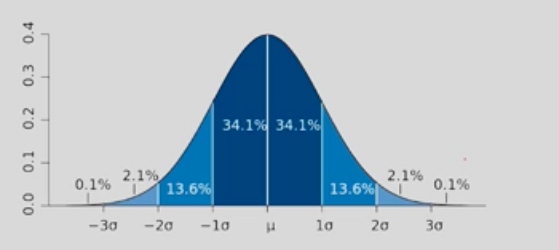

In [21]:
Image(filename='фото//output4.png')

**Как любые данные преобразовать к виду когда среднее значение =0, дисперсия = 1?**

z-стандартизация (или *z - оценка*) - процедура по превращению нормального распределения $X \backsim N(\mu , \sigma)$ в стандартное $Z \backsim N(0 , 1)$ с Z-шкалой (*Z-scores*).

$$ Z_{i}=\frac{x_{i} - \bar{X}}{sd} $$


Это преобразование включает центрирование случайной величины (разность ${ {(x-\mu )}} $ между данной случайной величиной x и ее математическим ожиданием $ \mu $ и нормирование (отношение $x \over \sigma $ данной случайной величины x к ее стандартному отклонению $\sigma $.

Почему среднее превращется в ноль, а дисперсия в единицу? Так как 
 - числитель: среднее - среднее = 0, а занчит деление на любое число не повлияет на среднее]
 - знаменатель: так как каждое значение умножается на  $1  \over \sigma $ то дисперсию нужно ужножать на квадрат этого числа, а занчит $D_x $* $1  \over \sigma^2$  =$ D_x * 1/D_x =1  $

**Стандартизация не меняет форму распредления**

Правило 3-х сигм - вероятность того, что случайная величина отклонится от своего математического ожидания более чем на три среднеквадратических отклонения, практически равна нулю. Правило справедливо только для случайных величин, распределенных по нормальному закону.

\begin{array} { l } P( { \left| { X-a }\right|<\sigma } )=P( { a-\sigma <X<\sigma +a } )=0,6826 \\ P( { \left| { X-a }\right|<2\sigma } )=P( { a-2\sigma <X<2\sigma +a } )=0,9545 \\ P( { \left| { X-a }\right|<3\sigma } )=P( { a-3\sigma <X<3\sigma +a } )=0,9973 \\ \end{array}

[z таблица](https://web.archive.org/web/20180729102938/http://users.stat.ufl.edu/~athienit/Tables/Ztable.pdf): процент наблюдений, не превышающий указанное z-значение.

Если надо найти процент превышающи: вычитаем из 1 это значение

`Читается: вероятность встретить не превышающее/ превышающее  в z - шкале составляет `

### функции
 - scipy.stats.norm.cdf() - накопительная функция нормального распределения по известному "z". Т.е. сколько % от выборки расположены до/меньше заданной величины.
  - Функция norm.cdf, наоборот, выдаёт для известного значения вероятность интервала слева от этого значения.
  - **cdf - Cumulative Distribution Functions** -Функция распределения
 

In [22]:
print(f'На промежутке [-∞ ; 0,8σ] расположено {stats.norm.cdf(0.8):.2%} значений')

На промежутке [-∞ ; 0,8σ] расположено 78.81% значений


 - scipy.stats.norm.sf() - сколько % от выборки расположены после/больше заданной величины.
 

In [23]:
print(f'На промежутке [-∞ ; 0,8σ] расположено {stats.norm.sf(0.8):.2%} значений')

На промежутке [-∞ ; 0,8σ] расположено 21.19% значений


- st.norm.cdf(z2) - st.norm.cdf(z1)" - сколько % от выборки расположены внутри заданного промежутка.

In [24]:
print(f'На промежутке [-2σ ; 0,8σ] расположено {(stats.norm.cdf(0.8) - stats.norm.cdf(-2)):.2%} значений')

На промежутке [-2σ ; 0,8σ] расположено 76.54% значений


 - st.norm.cdf(z1) + st.norm.sf(z2)" - сколько % от выборки расположены за пределами заданного промежутка.

In [25]:
print(f'На промежутке [-∞ ; -2σ]U[0,8σ ; +∞] расположено {(stats.norm.sf(0.8) + stats.norm.cdf(-2)):.2%} значений')

На промежутке [-∞ ; -2σ]U[0,8σ ; +∞] расположено 23.46% значений


 - "st.norm.ppf()" - вычисление значения "z" по известному значению накопительной функции распределения. Обратное значение от "st.norm.cdf()"
 - **ppf - probability density function** - Функция распределения вероятностей
 - Функция norm.ppf выдаёт значение переменной для известной вероятности интервала слева от этого значения.
 - другими словами пусть сказано, что значение превышает 78,8 процентов выборки, нужно понять что это за значение

In [26]:
print(f'st.norm.ppf(st.norm.cdf(-2)) = {stats.norm.ppf(stats.norm.cdf(-2)):.1f}')

st.norm.ppf(st.norm.cdf(-2)) = -2.0


### Задачи

In [27]:
'''Задача1
Считается, что значение IQ (уровень интеллекта) у людей имеет нормальное распределение со средним значением равным 100 и стандартным отклонением равным 15 (M = 100, sd = 15).
Какой приблизительно процент людей обладает IQ > 125?'''

M, sd, IQ = 100, 15, 125

def z_score(M, sd, IQ):
    return (IQ-M)/sd

z_ =z_score(M, sd, IQ) 
(1- stats.norm.cdf(z_))*100

4.77903522728147

In [28]:
'''Считается, что значение IQ (уровень интеллекта) у людей имеет нормальное распределение со средним значением равным 100 и стандартным отклонением равным 15 (M = 100, sd = 15).
Какой приблизительно процент людей обладает IQ  на промежутке от 70 до 112 '''

M, sd, IQ_min, IQ_max = 100, 15, 70, 112
z_1= z_score(M, sd, IQ_min)
z_2 = z_score(M, sd, IQ_max)
stats.norm.cdf(z_2) - stats.norm.cdf(z_1)

0.7653944694684242

<div class="alert alert-warning">
<h2> Центральная предельная теорема </h2>
</div>

   `ЦПТ гласит, что множество средних выборок из ГС (ГС необязательно иметь нормальное распределние) будут иметь примерно нормальное распределение. Причём средняя этого распределения будет близко к средней генеральной совокупности, а стандарное отклонение этого распределение будет называться стандарной ошибкой среднего ( 𝑠𝑒 ).`


`Стандартная ошибка среднего` - это среднеквадратическое отклонение распределения выборочных средних!


**Сила и смысл ЦПТ**: 
**2 глубинная суть**: при многократном повторении испытаний относительная частота появления случайной величины становится приблизительно равной ее вероятности.

Зная стандартное отклонение ГС и размер выборки мы можем рассчитать стандартную ошибку среднего.

$$ E.S.E. = se = \frac{\sigma}{\sqrt{N}} $$

где $N$ - размер выборки. 

Если размер выборки достаточно большой (экспериментально $N>30$) и она является репрезативна (очень похожа на ГС), то вместо стандарного отклонения ГС мы можем взять стандарное отклонение выборки.

$$ E.S.E.  = se = \frac{sd}{\sqrt{N}} $$

E.S.E. — оценённая стандартная ошибка (от англ. estimated standard error).

**Другими словами если мы имеем, что среднее генеральной совокупности равно 3, а стандартное отклонение = 5 (то есть дисперсия 25), и мы собираемся вынимать случайным образом подвыбору 100 раз, то срtднее значения в этих выборках распределяется как $ 3\pm \frac{5}{ \sqrt {100}}$**


- Чем меньше стандартная ошибка среднего, тем реже выборочные средние будут сильно отклоняться от среднего в генеральной совокупности

- Стандартная ошибка среднего тем меньше, чем больше объем выборки и меньше вариативность исследуемого признака

- Распределение выборочных средних является нормальным, со средним равным среднему значению признака в генеральной совокупности

- Стандартная ошибка среднего - это среднеквадратическое отклонение распределения выборочных средних

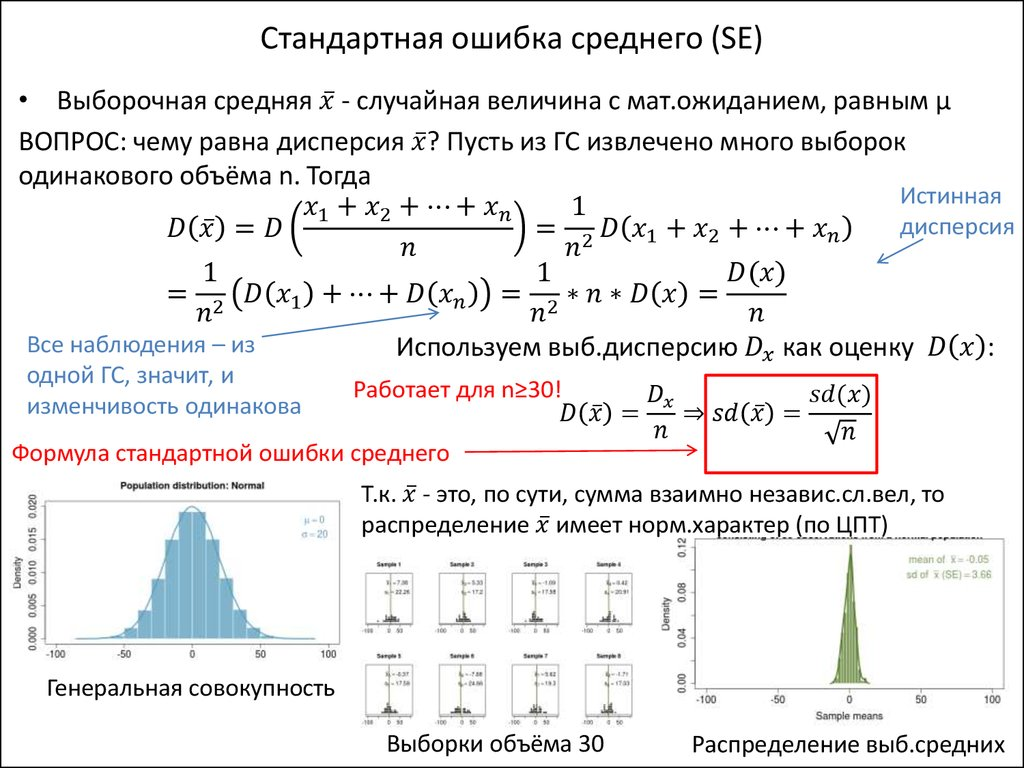

In [29]:
Image(filename='фото//slide-6.jpeg', width=600,  height=400,)

<div class="alert alert-warning">
<h2> Доверительные интервалы для среднего </h2>
</div>

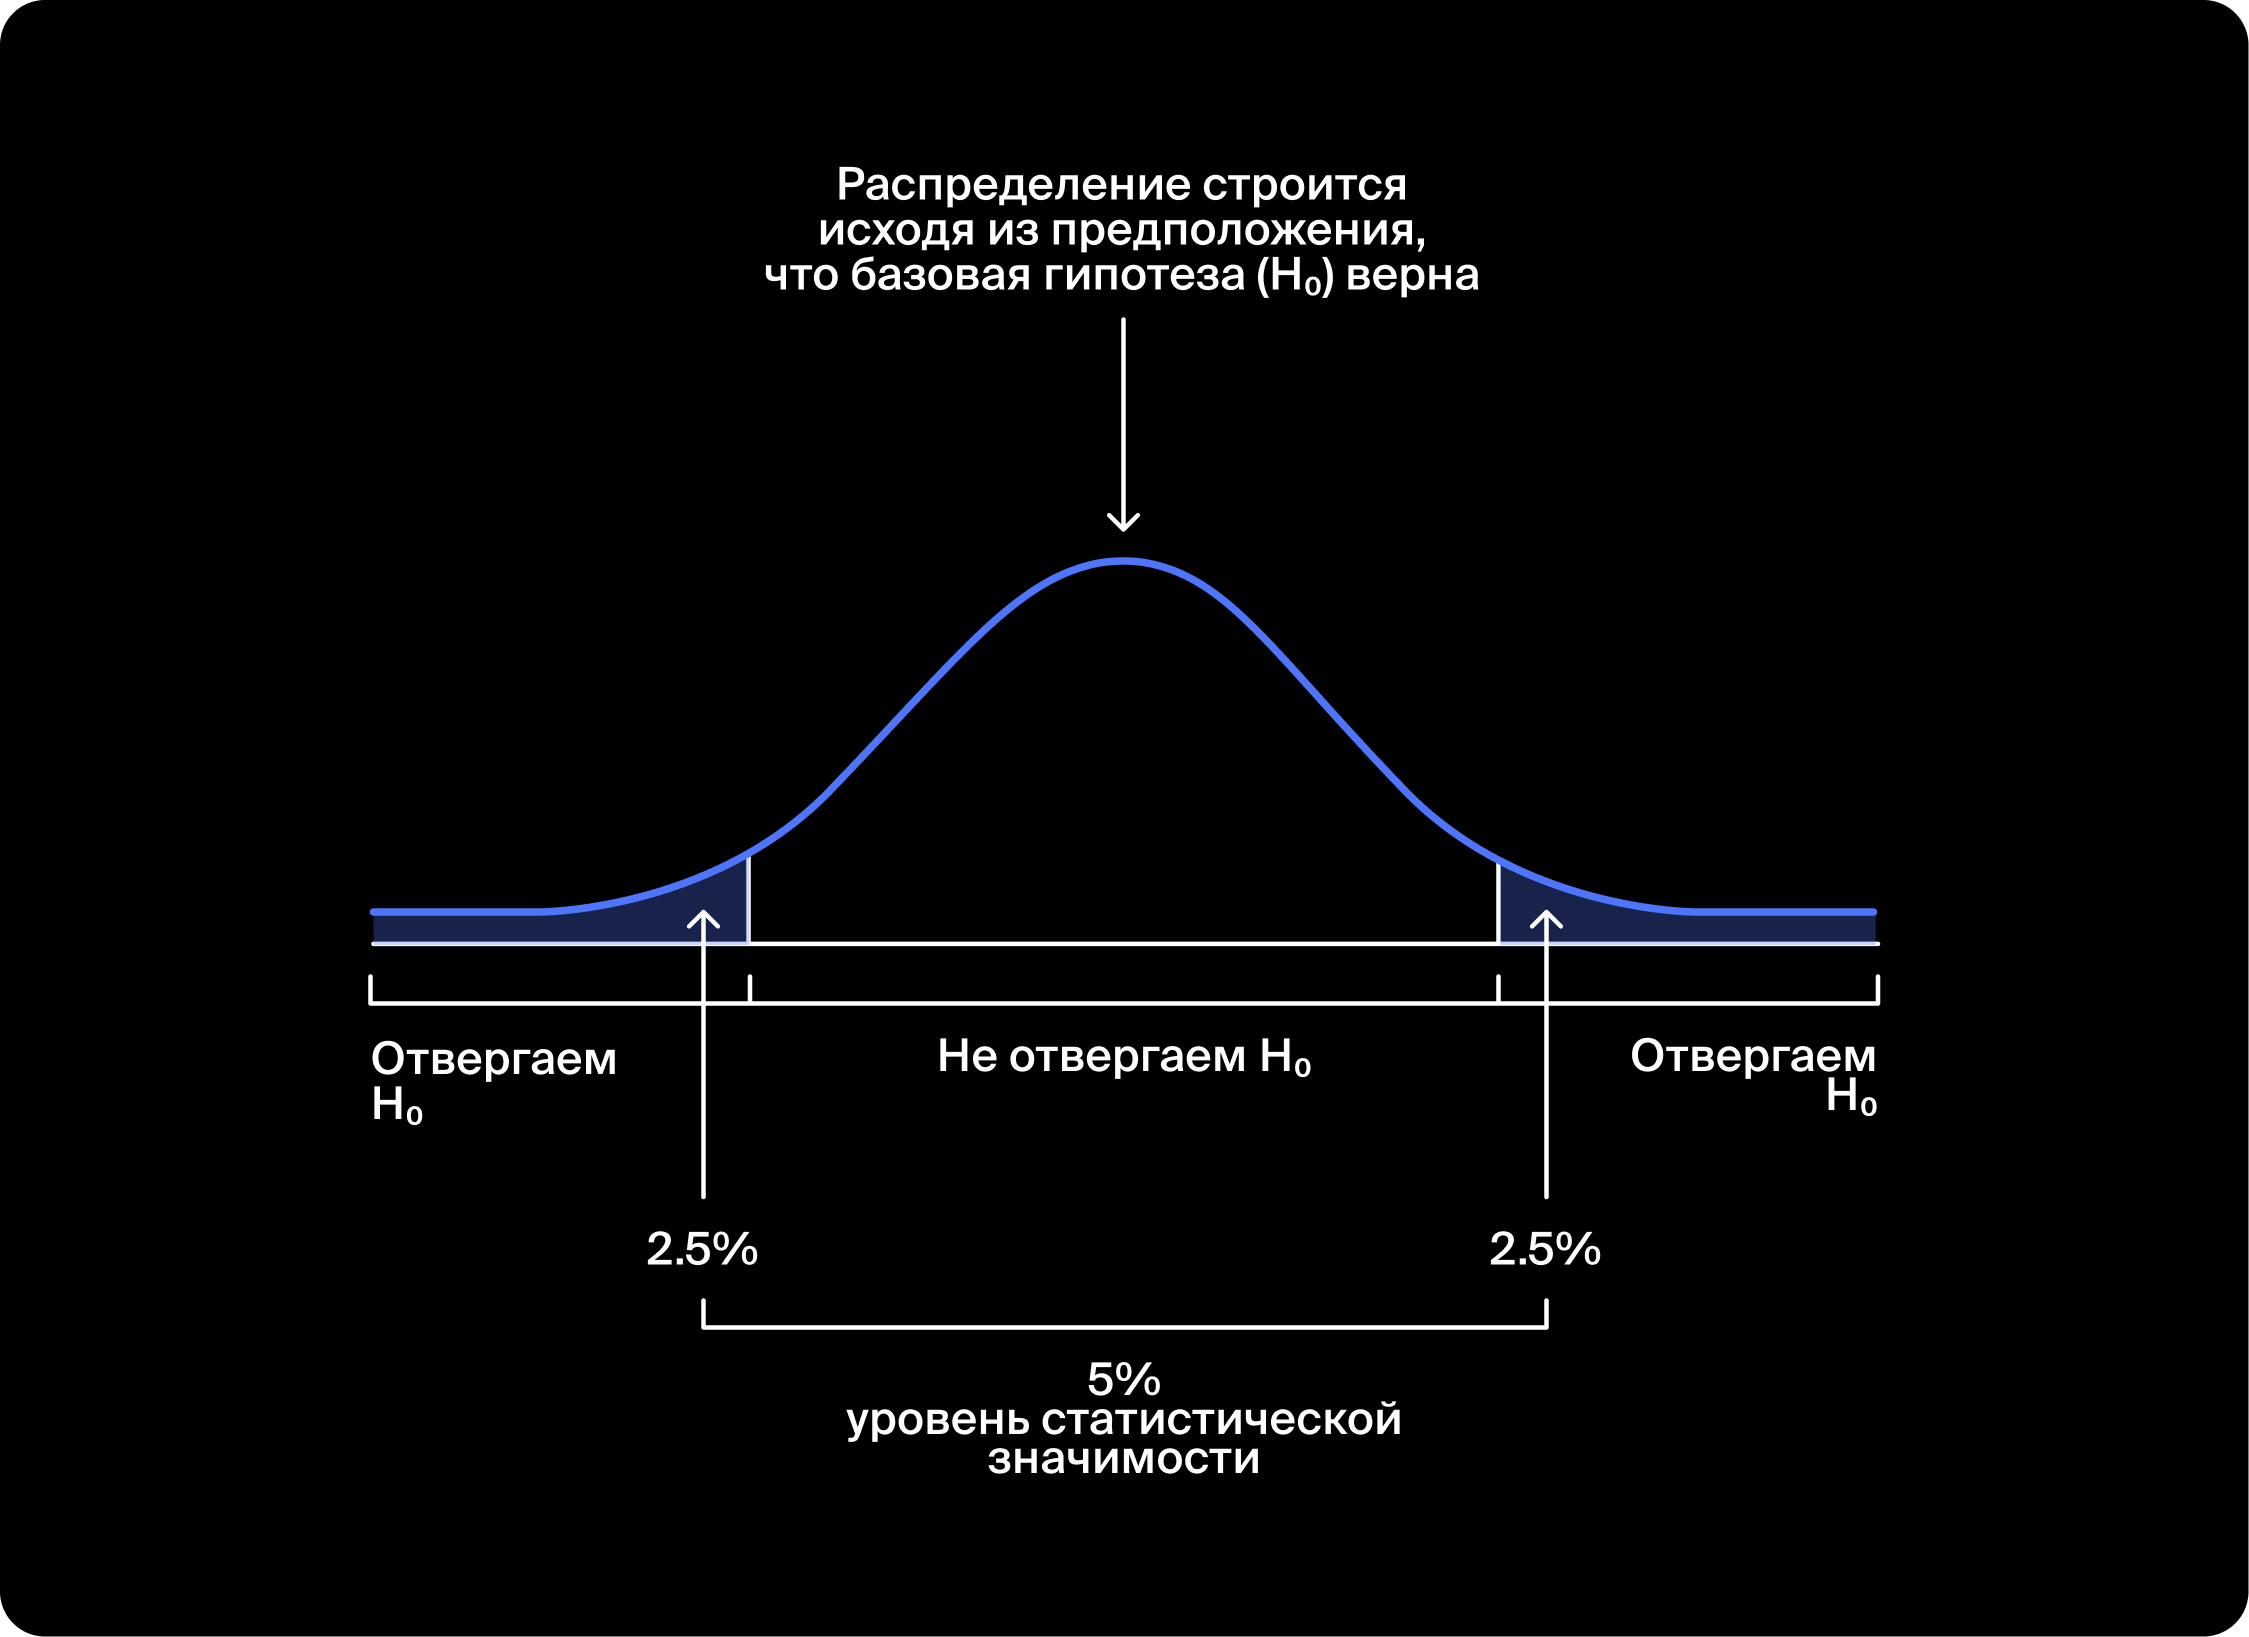

In [30]:
Image(filename='фото//image.png', width=600,  height=400,)

**Зачем: оценивать неизвестный параметр генеральной совокупности**

Доверительный интервал для среднего</span>

\[μ - 1,96σ ; μ + 1,96σ\] – <strong>95%</strong> всех выборочных средних включили бы в данный интервал среднее генеральной совокупности μ

\[μ - 2,58σ ; μ + 2,58σ\] – <strong>99%</strong> доверительный интервал

Чем больше уровень достоверности – 99%, 99,9%... (=доверительный уровень) тем ШИРЕ будет интервал

`Доверительным интервалом и представляет собой интервальную оценку генерального значения  по найденному выборочному значению`

### Задачи

In [31]:
'''Задача
Рассчитайте 99%-ый доверительный интервал для следующего примера: 
среднее (X с чертой) = 10, стандартное отклонение (sd) = 5, размер выборки (n) = 100
'''

'Задача\nРассчитайте 99%-ый доверительный интервал для следующего примера: \nсреднее (X с чертой) = 10, стандартное отклонение (sd) = 5, размер выборки (n) = 100\n'

In [32]:
#python доверительные интервалы
def conf_interval_norm(М_mean, sd, n, accuracy):
    se = sd/(n**(1/2))
    if accuracy == 95:
        di_1 = М_mean - se*1.96
        di_2 = М_mean + se*1.96
        print(f'Доверительный интервал для среднего: [{di_1} ; {di_2}]')
    elif accuracy == 99:
        di_1 = М_mean - se*2.58
        di_2 = М_mean + se*2.58
        print(f'Доверительный интервал для среднего: [{di_1} ; {di_2}]')

In [33]:
conf_interval_norm(10, 5, 100, 99)

Доверительный интервал для среднего: [8.71 ; 11.29]


In [34]:
# решение той же задачи, то с учетом того, что доверительный инервыал может быть любым
p = .99
X_ = 10
sd = 5
n = 100


se = sd/n**0.5  
alpha = (1-p)/2
sigma = stats.norm().isf(alpha)

сonfidence_interval = X_ - sigma*se, X_ + sigma*se

print("Доверительный интервал для среднего: [{:.2f};{:.2f}]".format(
                                    сonfidence_interval[0],
                                    сonfidence_interval[1]
                                ))

Доверительный интервал для среднего: [8.71;11.29]


### WHY is 1.96?

In probability and statistics, 1.96 is the approximate value of the 97.5 percentile point of the standard normal distribution. 95% of the area under a normal curve lies within roughly 1.96 standard deviations of the mean, and due to the central limit theorem, this number is therefore used in the construction of approximate 95% confidence intervals. 

In [35]:
# вариант 1
print(stats.norm.ppf(0.975))
print(stats.norm.cdf(stats.norm.ppf(0.975)))

1.959963984540054
0.975


In [36]:
# вариант 2
'''Вычисление 1.96 c помощью scipy'''
p = 0.95  
# так как у нас двухсторонний интервал, сделаем вычисление
alpha = (1-p)/2
# isf - Inverse survival function (inverse of sf)
print(alpha)
print(stats.norm().isf(alpha))

0.025000000000000022
1.959963984540054


[красивая визуализация доверительных интервалов](https://seeing-theory.brown.edu/frequentist-inference/index.html#section2)

- Мы можем быть на 95% уверены, что среднее значение в ГС принадлежит рассчитанному доверительному интервалу.
- Если многократно повторять эксперимент, для каждой выборки рассчитывать свой доверительный интервал, то в 95 % случаев истинное среднее будет находиться внутри доверительного интервала.
 - В центре 95% доверительного интервала, рассчитанного по выборочным значениям, находится Выборочное среднее значение

<div class="alert alert-warning">
<h2> Идея статистического вывода, p-уровень значимости</h2>
</div> 

**Нулевая гипотеза (H0)** – отсутствие значимых различий между средним значением выборки и средним значением генеральной совокупности.

**Альтернативная гипотеза (H1)** – значимое отклонение между средним значением выборки и средним значением генеральной совокупности.

Ошибка 1 рода – приняли альтернативную гипотезу, хотя верна нулевая  (англ. type I errors, α errors, false positive, ошибочное отвержение).

Ошибка 2 рода – приняли нулевую гипотезу, хотя верна альтернативная (англ. type II errors, β errors, false negative, ошибочное принятие).)

Разберем пример. На выздоровление в среднем требуется $M=20$ дней. Однако, мы разработали препарат и решили выяснить, можно ли сократить этот срок. Мы набрали выборку из $N=64$ пациентов и опробовали на них новый метод лечения. Оказалось, что средний срок выздоровления сократился до $\bar{X} = 18.5$ дней. При среднеквадратическом или же стандартном отклонении(тк выборка, а не ГС) $sd=4$.

**Какой же вывод можно сделать, основываясь на этих данных?**
- с одной стороны мы, действительно, сократили срок выздоровления;
- с другой, такой результат мог быть получен совершенно случайно.

Давайте введем два очень важных понятия. В нашем исследовании будут конкурировать две гипотезы.
- нулевая гипотеза $H_{0}$ будет предполагать, что никакого воздействия новый препарат не оказывает и среднее значение ГС тех пациентов, кто использует наш новый препарат $M_{НП}=20$.
- альтернативная гипотеза $H_{1}$ утверждает, что наш препарат влияет на скорость выздоровления и среднее значение скорости выздоровления ГС тех, кто использует новый препарат $M_{НП}\neq20$.

Давайте рассуждать так: предположим, что верна нулевая гипотеза $H_{0}$, тогда в соответствии с ЦПТ, если бы мы многократно повторяли наши исследования, то выборочные средние распределидлись нормальным образом вокруг среднего ГС ($M=20$) и со стандартьным отклонением нашего распределения или со стандартной ошибкой среднего $se = \frac{sd}{\sqrt{N}}=\frac{4}{\sqrt{64}}=0.5$.

Теперь давайте ответим на следующий вопрос: **насколько далеко наше выборочное среднее отклонилось от предполагаемого среднего ГС в единицах стандартного отклонения?**  
Выполним z-преобразование. Из нашего выборочного среднего вычтем среднее ГС и разделим на стардартное отклонение нашего распределения (нашего распределения предполагаемых выборочных средних), в нашем случае стандартную ошибку среднего.
$$z=\frac{\bar{X}-M}{se}=\frac{18.5-20}{20}=-3$$
Это означает, что если бы в ГС среднее значение на самом деле равнялось бы $20$, то наше выборочное среднее отклонилось бы от среднего ГС на $-3\sigma$ в левую сторону.

In [37]:
#from scipy import stats 
#  выход за пределы интервала 
# рассчитываем вероятность такого или еще большего отклонения (помним про то, что сигма равна 1)
round((stats.norm.sf(3) + stats.norm.cdf(-3)) *100, 2)

0.27

Вводные условия про препараты из текущей главы:  
- На выздоровление в среднем требуется $M=20$ дней;
- Выборка из $N = 64$ пациентов;
- Новый срок выздоровления $\bar{X} = 18.5$;
- При стандартном отклонении $sd = 4$.
- $se = \frac{sd}{\sqrt{N}}=\frac{4}{\sqrt{64}}=0.5$.
- $X_{min} = x - 1.96*se = 18.5 - (1.96 * 0.5) = 17.52$
- $X_{max} = x + 1.96*se = 18.5 + (1.96 * 0.5) = 19.48$
- Доверительный интервал с надежностью 95%: $[17.52, 19.48]$, следовательно, 20 не входит в этот интервал.
- Обращаемся к условию задачи - если значение 20  не будет принадлежать 95% ДИ по выборке, у нас будет достаточно оснований отклонить нулевую гипотезу.

**p-уровень значимости** 
  - вероятность получения такого или еще более сильного отклонения от среднего значения, если верна H0. Чем меньше p, тем больше оснований отклонить нулевую гипотезу.
  - Фактически это вероятность ошибки при отклонении нулевой гипотезы (ошибки первого рода)
  - Обычно нулевая гипотеза отклоняется, и различия считаются статистически достоверными, если p < 0,05. чем хуже (рискованней) последствия ошибки, тем меньше должна быть альфа.

**Основная идея статистического вывода**: сначала мы допускаем, что верна нулевая гипотеза (т.е. никаких различий или никаких взаимосвязей в ГС нет). После этого мы можем расчитать вероятность того, что мы получили такие или еще более сильно выраженные различия абсолютно случайно. Эта вероятность называется `p уровень значимости`. И с помощью этого показателя мы выясним, какая гипотеза будет являться более состоятельной. 
- Считается, если $p<0.05$ - можно смело принимать альтернативную гипотезу. 
- А вот если $p>0.05$ - считается, у нас недостаточно оснований отклонить нулевую гипотезу.

In [38]:
def output_p_value(p):
    if p >  0.05:
        return 'Принимаем H0, так как не получили значимых отклонений'
    else: 
        return 'Принимаем Н1, так как получили значимые отклонения'

In [39]:
'''
В среднем слушатели курса по введению в статистику набирают 115 баллов, однако, 
в 2015 году средний балл  случайно выбранных 144 участников составил 118 со стандартным отклонением равным 9. 
Рассчитайте p уровень значимости для проверки нулевой гипотезы о том, что среднее значение баллов в 2015 году равняется 115.
'''

# на вход подаем z оценку, которая расчитывается отденльно
def p_value_norm(z_stat, alternative = 'two-sided'):
   
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)
    

def z_value(x_0 , x_1 ,sd ,n ):
    se = sd / n ** 0.5
    z = (x_1 - x_0) / se
    return z 


x_0 = 115
x_1 = 118
sd = 9
n = 144

In [40]:
z = z_value(x_0 , x_1 ,sd ,n )
output_p_value(p_value_norm(z, alternative='greater'))

'Принимаем Н1, так как получили значимые отклонения'

# Сравние средних 

[сайт где можно себя проверить](https://gallery.shinyapps.io/dist_calc/)

<div class="alert alert-warning">
<h2> T-распределение </h2>
</div> 

Чем меньше выборка, тем большее отклонение выборочного среднего мы будем получать от среднего по ГС

Если число наблюдений невелико (n < 30) и стандартное отклонение генеральной совокупности σ неизвестно, то используется распределение Стьюдента (t-distribution):
  - унимодально
  - симметрично
  - **но наблюдения с большей вероятностью попадают за пределы ±2σ от μ, чем при нормальном распределении ТАК КАК ИМЕЕТ БОЛЕЕ ТЯЖЕЛЫЕ ХВОСТЫ распределеения**

Форма распределения определяется числом степеней свободы 
$$df = n-1, $$
 где $n$ -число наблюдений, df - degrees of freedom). С увелечением df распределение стремится к нормальному.



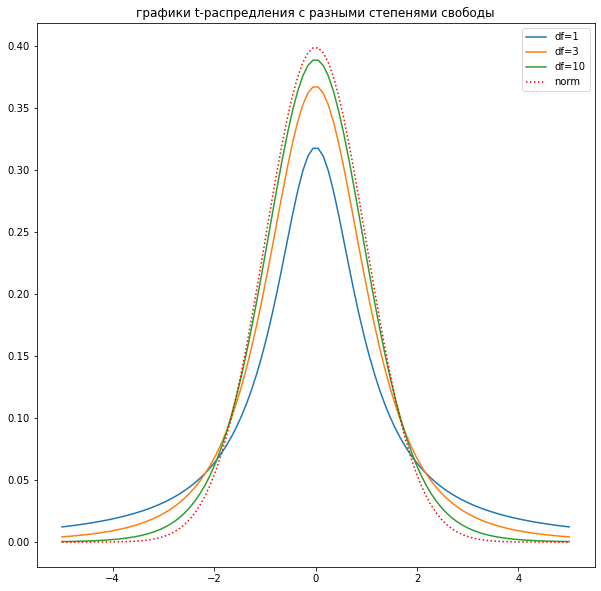

In [41]:
'''График снизу показывает, как меняется форма распределения при увеличение количества степеней свободы.
А также показывает приближение t-распредееления к нормальному по мере увеличения степеней свободы.'''



# возвращает одномерный массив из указанного количества элементов, равномерно распределенных внутри заданного интервала
x = np.linspace(-5, 5, 100)
y1, y2, y3 = stats.t.pdf(x, df=1), stats.t.pdf(x, df=3), stats.t.pdf(x, df=10)
y4 = stats.norm.pdf(x)

plt.figure(figsize=(10,10))
plt.title('графики t-распредления с разными степенями свободы')
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4, 'r:')
plt.legend(('df=1', 'df=3', 'df=10', 'norm'))

Вернемся к предельной центральной теореме, мы уже узнали, что если некий признак в генеральной совокупности распределен нормально (не обязательно) со средним μ и стандартным отклонением σ, и мы будем многократно извлекать выборки одинакового размера n, и для каждой выборки рассчитывать, как далеко выборочное среднее $\bar{X}$
  отклонилось от среднего в генеральной совокупности в единицах стандартной ошибки среднего:

$$\large z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}}$$

то эта величина z будет иметь стандартное нормальное распределение со средним равным нулю и стандартным отклонением равным единице.

Обратите внимание, что для расчета стандартной ошибки мы используем именно стандартное отклонение в генеральной совокупности - $\sigma$. Ранее мы уже обсуждали, что на практике $\sigma$ нам практически никогда не известна, и для расчета стандартной ошибки мы используем выборочное стандартное отклонение.

Так вот, строго говоря в таком случае распределение отклонения выборочного среднего и среднего в генеральной совокупности, деленного на стандартную ошибку, теперь будет описываться именно при помощи t - распределения
$$\large t = \frac{\bar{X} - \mu}{\frac{sd}{\sqrt{n}}}$$


**Tаким образом, в случае неизвестной $\sigma$ мы всегда будем иметь дело с t - распределением**

В дальнейшем мы всегда будем использовать t - распределение для проверки гипотез, если нам неизвестно стандартное отклонение в генеральной совокупности, необходимое для расчета стандартной ошибки, даже если объем выборки больше 30.

In [42]:
'''Если на выборке в 15 наблюдений при помощи одновыборочного t-теста проверяется нулевая гипотеза: μ=10 
и рассчитанное t-значение равняется -2 (t = -2), то p-уровень значимости  (двусторонний) равен?'''
def p_value_t_one_sample(t_stat,n, alternative = 'two-sided'):
    from scipy import stats
    df = n - 1
    if alternative == 'two-sided':
        p = 2 * (stats.t.sf(abs(t_stat), df))
    elif alternative == 'greater':
        p = stats.t.sf(t_stat, df)
    elif alternative == 'less':
        p = stats.t.cdf(t_stat, df)
    return p

p_value_t_one_sample(t_stat = 2, n = 15,  alternative = 'two-sided')


0.06528795288911197

Степени свободы - это кол-во элементов, которое может варьироваться при расчете некоторого статистического показателя. 
Важно понимать, сколько элеменов мы использовали чтобы получить тот или иной показатель t

**Почему минус 1?**
 - Допустим мы знаем, чему равняется выборочное среднее, тогда нам необходимо знать только n-1 элементов выборки, чтобы безошибочно определить чему равняется оставшейся n элемент.
 - Число степеней свободы — это разность числа наблюдений и числа оцененных параметров. При использовании одновыборочного t-критерия мы оценили один параметр — среднее значение в генеральной совокупности, используя n элементов выборки, значит df = n-1.

<div class="alert alert-warning">
<h2> Сравнение двух средних. t-критерий Стьюдента </h2>
</div> 

t-критерий Стьюдента — общее название для статистических тестов, в которых статистика критерия имеет распределение Стьюдента. Наиболее часто t-критерии применяются для проверки равенства средних значений в двух выборках. 

Нулевая гипотеза(H0) предполагает, что средние равны $(M_1 = M_2)$. 

Альтернативная гипотеза(H1) предполагает, что средние равны $(M_1 \neq M_2)$.

Для применения данного критерия необходимо, чтобы исходные данные имели нормальное распределение. 

$$ t = \frac{\bar{X_1} - \bar{X_2} - (M_1 - M_2)}{se} = \frac{\bar{X_1} - \bar{X_2}}{se}  $$

$$ se = \sqrt{\frac{sd_1^2}{n_1} + \frac{sd_2^2}{n_2}} $$

Откуда берётся такая формула $se$?:

$$ D=D_1+D_2$$ 
$$ se = \sqrt{D} = \sqrt{D_1+D_2}= \sqrt{se_1^2 + se_2^2} =\sqrt{\frac{sd_1^2}{n_1} + \frac{sd_2^2}{n_2}} $$
	

так как $  (se_1)^2 = (\frac{sd_1}{\sqrt{n_1}})^2 = \frac{sd_1^2}{n_1} $

$$df = n_1 + n_2 - 2$$

In [43]:

array1 = np.array([84.7, 105.0, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4, 93.0,
                   119.3, 99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114.0, 95.1, 115.5, 111.5])
array2 = np.array([57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7,
                   102.0, 69.0, 79.6, 68.9, 98.6, 76.0, 74.8, 56.0, 55.6, 69.4, 59.5])

# считаем количество элементов, среднее, стандартное отклонение и стандартную ошибку
df = pd.DataFrame({'Выборка1':array1, 'Выборка2':array2}).agg(['mean','std','count','sem']).transpose()
df.columns = ['M_x','SD','N','SE']

# рассчитываем 95% интервал отклонения среднего ( верхнее значение)
p = 0.95
K = stats.t.ppf((1 + p)/2, df['N']-1)
df['interval'] = K * df['SE']

df

,M_x,SD,N,SE,interval
Выборка1,100.815,10.246503,20.0,2.291188,4.795511
Выборка2,75.735,15.458102,20.0,3.456537,7.234614


In [44]:
mean_dif = df.loc['Выборка1', 'M_x'] - df.loc['Выборка2', 'M_x']
denominator = (df.loc['Выборка2', 'SE']**2 + df.loc['Выборка1', 'SE']**2)**.5
t_score = mean_dif / denominator
t_score

6.047819587898917

In [45]:
def results(t_stat,n, alternative = 'two-sided'):
    x = p_value_t_one_sample(t_stat,n, alternative = 'two-sided')
    a = ('Вероятность получить такие или еще выраженные отклонения при условии что на самом деле верна нулевая гипотеза {:.4f} %'.format(x))
    return x, a

In [46]:
results(t_score, 40)[1]

'Вероятность получить такие или еще выраженные отклонения при условии что на самом деле верна нулевая гипотеза 0.0000 %'

In [47]:
output_p_value(results(2.5, 40)[0])

'Принимаем Н1, так как получили значимые отклонения'

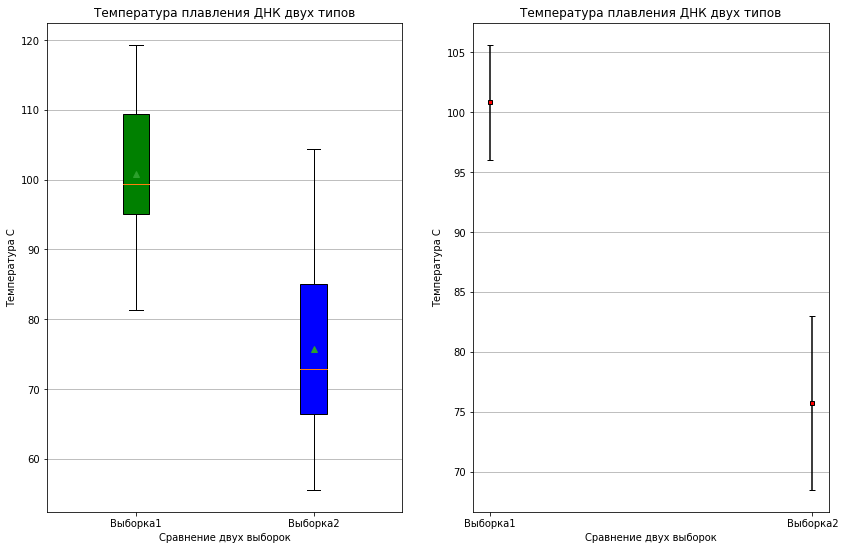

In [48]:
#строим графики, boxplot из изначальных данных array1, array2,  доверительные интервалы из датафрейма df
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 9))

# график boxplot
bplot1 = ax1.boxplot([array1, array2],
                     vert=True,  # создаем вертикальные боксы
                     patch_artist=True, # для красоты заполним цветом боксы квантилей
                     labels=['Выборка1', 'Выборка2'], showmeans= True) # используется для задания значений выборок в случае с boxplot

# график доверительных интервалов (для симметричных)
bplot2 = ax2.errorbar(x=df.index, y=df['M_x'], yerr=df['interval'],\
                      color="black", capsize=3, marker="s", markersize=4, mfc="red", mec="black", fmt ='o')

# раскрасим boxplot  
colors = ['green', 'blue']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    
# добавим общие для каждого из графиков данные
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_title('Температура плавления ДНК двух типов')
    ax.set_xlabel('Сравнение двух выборок')
    ax.set_ylabel('Температура C')
    
plt.show()

**Как видно из правого рисунка средняя первой выборки не попадает в доверительный интервал второй выборки, поэтому отличия нахих средних значимо**

Оценка t - критерием осуществляется, когда имеется гомогенность дисперсии, которую  можно оценить, используя "Критерий Левена" или "Критерий Фишера".

Если t < 30, нужно чтобы распределение выборок было нормальным

In [49]:
# Взаимоявязи

$$(x1-x2)↑ → t↑$$
$$sd↓ → t↑$$
$$n↑ → t↑$$
$$t↑ → p↓$$

In [50]:
'''Рассчитайте доверительный интервал основываясь на знании t - распределения для \
среднего значения температуры плавления ДНК у первого вида: X=89,9 , sd=11.3 ,  n=20'''
def dd(x_mean, sd, n, alpha):
    df = n - 1 
    # ppf - Percent point function
    t_score = stats.t(df).ppf(1-(alpha/2))
    x_left, x_right = x_mean - t_score *sd / np.sqrt(n), x_mean + t_score *sd / np.sqrt(n), 
    return ' доверительный интервал [{:.4f} , {:.4f}]'. format(x_left, x_right)

dd(89.9, 11.3, 20,  0.05)

' доверительный интервал [84.6114 , 95.1886]'

In [51]:
'''Используя t - критерий проверьте, можно ли считать наблюдаемые различия в возрасте между\
лучшими актрисами и актерами  статистически достоверными.
Средний возраст мужчин равен 45, sd = 9.
Средний возраст женщин равен 34, sd = 10.'''

def t_score(m1, sd1 , m2  , sd2 , n ):
    df =n -1
    t_score = abs(m1 - m2) / np.sqrt ( sd2**2 / n + sd1**2 / n)
    return t_score

In [52]:
t_score = t_score(m1 = 45, sd1 = 9, m2 = 34 , sd2 = 10 , n = 100)
t_score

8.176235608718828

In [53]:
def p_value_two_sample(t_stat,n1,n2 ,alternative = 'two-sided'):
    from scipy import stats
    df = n1+n2 -2
    if alternative == 'two-sided':
        p = 2 * (stats.t.sf(abs(t_stat), df))
    elif alternative == 'greater':
        p = stats.t.sf(t_stat, df)
    elif alternative == 'less':
        p = stats.t.cdf(t_stat, df)
    return p
p = p_value_two_sample(t_stat = t_score, n1 = 100, n2= 100,  alternative = 'two-sided')
p

3.4555440142902684e-14

In [54]:
output_p_value(p)

'Принимаем Н1, так как получили значимые отклонения'

In [55]:
# очень просто
stats.ttest_ind_from_stats(45,9,100,34,10,100)

Ttest_indResult(statistic=8.176235608718828, pvalue=3.4555440142902684e-14)

<div class="alert alert-warning">
<h2>  Проверка распределения на нормальность, QQ-Plot </h2>
</div> 

* Простым и часто используемым графиком для быстрой проверки распределения выборки данных является гистограмма
* Другим популярным графиком для проверки распределения выборки данных является график квантиль-квантиль, график Q-Q или график QQ для краткости.
   - Этот график генерирует собственную выборку идеализированного распределения, с которым мы сравниваем, в данном случае распределение Гаусса. Идеализированные образцы делятся на группы (например, 5), называемые квантилями. Каждая точка данных в выборке связана с аналогичным элементом из идеализированного распределения с тем же кумулятивным распределением.
   - Идеальное совпадение для распределения будет показано линией точек под углом 45 градусов от нижнего левого угла графика до правого верхнего угла. Часто на графике рисуется линия, чтобы прояснить это ожидание. Отклонения по точкам от линии показывают отклонение от ожидаемого распределения.
   - все что выше оси вверх = больше чем в нормальном распредлении
   - все что ниже оси (находится под ней) = меньше чем в нормальном распределении

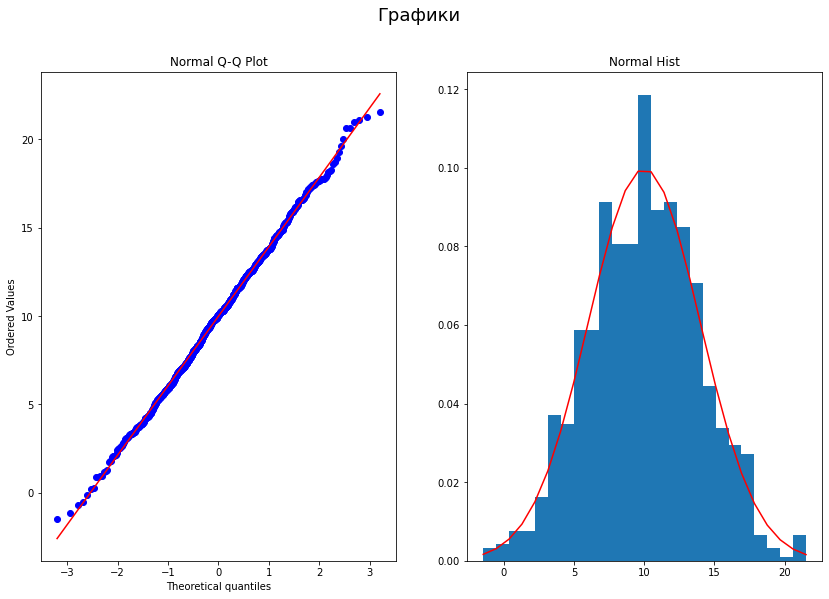

In [56]:
mu, sigma = 10, 4
n = 1000 # с ростом числа точек в распределении qq-plot стремится к прямой
sequence = np.random.normal(mu, sigma, n,)


fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14, 9) )
fig.suptitle('Графики', fontsize=18)

# Q-Q Plot graph
stats.probplot(sequence, dist="norm", plot=ax1)
ax1.set_title("Normal Q-Q Plot")

# normal distribution histogram + distribution
count, bins, _ = ax2.hist(sequence, 25, density=True)
p_x = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )
ax2.set_title("Normal Hist")
ax2.plot(bins, p_x, color='r')
 

plt.show()

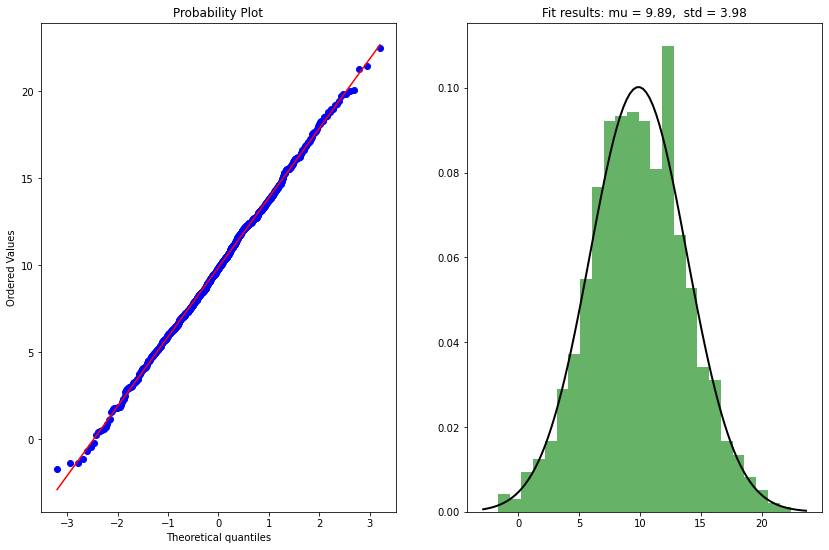

In [57]:
# Generate some data for this demonstration.
data = stats.norm.rvs(loc=10, scale=4, size=1000)

# Fit a normal distribution to the data:
mu, std = stats.norm.fit(data)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 9))

# Q-Q plot (probability plot)
stats.probplot(data, plot=ax1)

# Plot the histogram.
ax2.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
ax2.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

Статистические тесты нормальности

**Тест Шапиро-Вилка оценивает выборку данных и дает количественную оценку вероятности того, что данные были получены из гауссовского распределения**

Нулевая гипотеза: выборка извлечена из нормального распредлеения ГС

Альтернативная гипотеза: выборка извлечена из ненормального распредлеения ГС

In [58]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)


**K^2-тест Д'Агостино вычисляет итоговую статистику на основе данных, а именно, эксцесс и асимметрия, чтобы определить, отклоняется ли распределение данных от нормального распределения**

In [59]:
# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.102, p=0.950
Sample looks Gaussian (fail to reject H0)


**Тест Андерсона-Дарлинга представляет собой модифицированную версию более сложного непараметрического статистического критерия соответствия, называемогоТест Колмогорова-Смирнова**
   - Вместо простого значения p тест возвращает критическое значение для диапазона различных обычно используемых уровней значимости.

In [60]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('[{:.3f} - {:.3f}], data looks normal (fail to reject H0)'.format(sl, cv))
	else:
		print('[{:.3f} - {:.3f}], data does not look normal (reject H0)'.format(sl, cv))

Statistic: 0.220
[15.000 - 0.555], data looks normal (fail to reject H0)
[10.000 - 0.632], data looks normal (fail to reject H0)
[5.000 - 0.759], data looks normal (fail to reject H0)
[2.500 - 0.885], data looks normal (fail to reject H0)
[1.000 - 1.053], data looks normal (fail to reject H0)


**Тест Колмогорова Смирнова**

In [61]:
import numpy as np
from scipy.stats import kstest

mu,sigma = 0.07, 0.89
statistic, p = kstest(np.random.normal(mu,sigma,10000),'norm')
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


Если распределение отличается от нормального используется Критерий Манна-Уитни.
Непараметрический U-критерий Манна -Уитни не столь чувствителен к наличию выбросов по сравнению с t-тестом
Он переводит все данные в ранговую шкалу. Такой критерий гораздо менее чувствителен к отклонениям от нормальности и может быть использован при наличии значительных выбросов в выборке.

<div class="alert alert-warning">
<h2>  Однофакторный дисперсионный анализ </h2>
</div> 

ANOVA (ANalysis Of VAriance) позволяет сранивать средние значения в трех и более группах.

Рассмотренный ранее **t-критерий Стьюдента** (равно как и его непараметрические аналоги) предназначен для сравнения исключительно **двух совокупностей**. В таком случае мы можем применять однофакторный дисперсионный анализ.  Та переменная, которая будет разделять наших испытуемых или наблюдения на группы (номинативная переменная с нескольким градациями) называется **независимой переменной**. А та количественная переменная, по степени выраженности которой мы сравниваем группы, называется **зависимая переменная**. 


$$ SS_{total} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x})^2}} = SS_{between} + SS_{within} $$
$$ SS_{between} = \sum_{j=1}^{p}{n_j{(\bar{x}_j - \bar{x})^2}} $$
$$ SS_{within} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x}_j)^2}} $$


Когда мы делим значение межгрупповой суммы квадратов на соответствующее число степеней свободы (число групп минус один), мы тем самым усредняем полученный показатель. Усредненное значение межгрупповой суммы квадратов называется межгрупповым средним квадратом  

$$ MS_{bg}=\frac{SSB}{df_{bg}}\quad df_{bg}=m-1\quad $$

Отношение внутригрупповой суммы квадратов к соответствующему числу степеней свободы (число всех наблюдений минус число групп) — это внутригрупповой средний квадрат 

$$MS_{wg}=\frac{SSW}{df_{wg}}\quad df_{wg} = N-m$$

Поэтому формула F-значения (F-отношение) часто записывается:

$$F=\frac{MS_{bg}}{MS_{wg}}$$

In [62]:
def anova(a, b, c, p_val=0.05):
    """
    Подсчет значения F-критерия для трех групп
    """
    import scipy.stats as ss
    from numpy import mean
    common=a+b+c
    df=len(common)-1
    ssb=len(a)*((mean(a)-mean(common))**2)+ \
        len(b)*((mean(b)-mean(common))**2)+ \
        len(c)*((mean(c)-mean(common))**2)
    df_ssb = 3 - 1 #количество групп - 1
    ssw=sum([(a[i]-mean(a))**2 for i in range(len(a))]) + \
        sum([(b[i]-mean(b))**2 for i in range(len(b))]) + \
        sum([(c[i]-mean(c))**2 for i in range(len(c))])
    df_ssw = len(common) - 3 # кол-во наблюдений - кол-во групп
    f_stat = (ssb/df_ssb) / (ssw/df_ssw)
    pval=ss.f.sf(f_stat, df_ssb, df_ssw)
    return f_stat, df, pval

anova([3,1,2], [5, 3, 4], [7,6,5]) #(12.0, 8, 0.008000000000000002)

(12.0, 8, 0.008000000000000002)

In [63]:
# пример другой реализациию, где кол-во групп задается произвольно

Нулевая гипотеза: a=b=c
Альтернативная гипотеза: !(a=b=c)
Результат:
отклоняем нулевую гипотезу


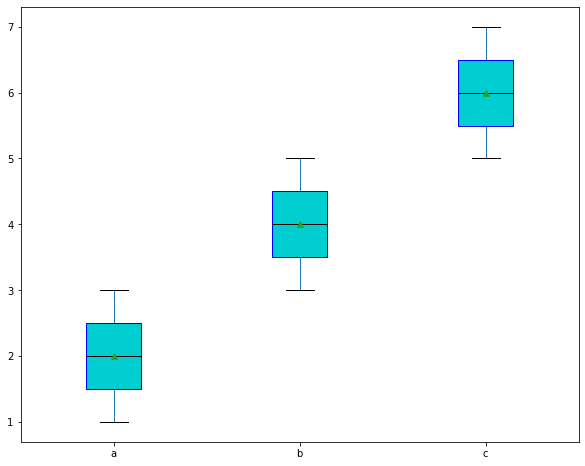

In [64]:
from scipy import stats
import pandas as pd



# Выборки которые надо сравнить
data = pd.DataFrame({
           'a': [3, 1, 2],
           'b': [5, 3, 4],
           'c': [7, 6, 5]
          })
data.boxplot(figsize = [10,8],
                     patch_artist=True,
                     labels= list(data.columns)
            , medianprops=dict(color='black')
            , boxprops=dict(facecolor='darkturquoise', color='blue'), grid= False
            ,showmeans= True)

    
    
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!({"=".join(data)})')
# общая средняя
grand_mean = data.values.flatten().mean()
# отклонение групповых средний от общей средней
ssb = sum(data[group].size * (group_mean - grand_mean)**2  for group, group_mean in data.mean().items())
# отклонения значений в внутри группы от средней группы
ssw = sum(sum((x - group_mean)**2 for x in data[group]) for group, group_mean in data.mean().items())

groups = data.shape[1]
dfb = groups - 1
dfw = data.size - groups
# межгрупповой средний квадрат  
mssb = ssb/dfb
# внутригрупповой средний квадрат
mssw = ssw/dfw

f_value = mssb/mssw

p = stats.f.sf(f_value, dfb, dfw)
print('Результат:')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

In [65]:
F = 3.5
m = 4 #количество групп
N = 5*m #размер общей выборки
def checking_hip_F(F , cnt_group, cnt_in_sample):
    N = cnt_group * cnt_in_sample
    dfw = N - cnt_group #внутригрупповое число степеней свободы
    dfb = cnt_group -1 #межгрупповое число степеней свободы
    p = 1 - stats.f.cdf(F, dfb, dfw)
    return print('Принимаем H0, так как не получили значимых отклонений и  p>0.05' \
          if p>0.05 else 'Оклоняем H0, так как получили значимые отклонения и  p<0.05')

In [66]:
checking_hip_F(3.5 , 4, 5)

Оклоняем H0, так как получили значимые отклонения и  p<0.05


Чем меньше значение F-критерия и при неизменных числах, характеризующих сравниваемые группы (их число m и общее число наблюдений N), тем большая площадь лежит по правую сторону от F-значения, а значит тем большее значение принимает p-уровень значимости. При анализе графика распределения Фишера, кстати, важно помнить, что мы рассчитываем вероятность p только в правом хвосте, то есть P(X>F) и то, что все F-значения всегда положительны.

In [67]:
# Задача на Anova

F = 8.03730248114399, Вероятность получить такое или еще большое отклонение возможно с веростностью p = 0.00015249722895229536
Так как p < 0.05, отклоняем нулевую гипотезу


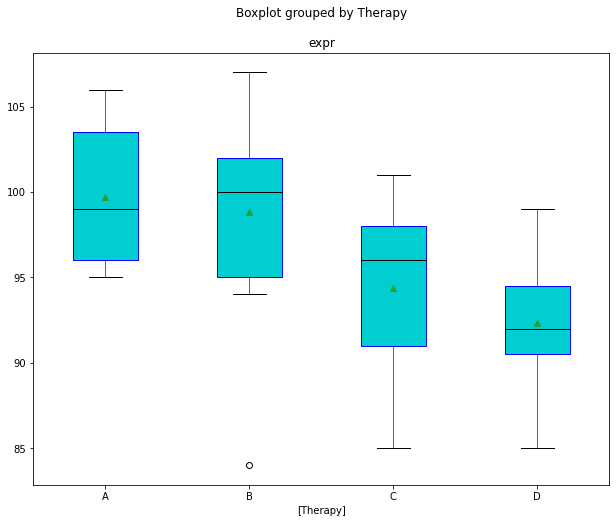

In [68]:
#import pandas as pd
#from scipy import stats

data_stepik = pd.read_csv('https://stepik.org/media/attachments/lesson/8083/genetherapy.csv')

A_therapy = data_stepik[data_stepik["Therapy"] == "A"]["expr"]
B_therapy = data_stepik[data_stepik["Therapy"] == "B"]["expr"]
C_therapy = data_stepik[data_stepik["Therapy"] == "C"]["expr"]
D_therapy = data_stepik[data_stepik["Therapy"] == "D"]["expr"]

terapy_abcd = [A_therapy, B_therapy, C_therapy, D_therapy]

F, p = stats.f_oneway(*terapy_abcd)
print(f'F = {F}, Вероятность получить такое или еще большое отклонение возможно с веростностью p = {p}')
if p < 0.05:
    print('Так как p < 0.05, отклоняем нулевую гипотезу')
else:
    print('Так как p > 0.05, не отклоняем нулевую гипотезу')

# Группируем по Therapy и рисуем boxplot для каждой группы
data_stepik[['Therapy', 'expr']].boxplot(by='Therapy', figsize = [10,8],
                                        patch_artist=True
                                        , medianprops=dict(color='black')
                                        , boxprops=dict(facecolor='darkturquoise', color='blue'), grid= False
                                        ,showmeans= True)
plt.show()

In [69]:
d_statistics = data_stepik.pivot_table(index = 'Therapy', values ='expr', aggfunc = ['count' , np.mean , 'std']).reset_index()
d_statistics.set_axis([ 'Therapy','count', 'mean', 'std' ], axis = 'columns', inplace = True)
d_statistics

,Therapy,count,mean,std
0,A,15,99.733333,4.165619
1,B,15,98.800000,5.894307
2,C,15,94.400000,5.193402
3,D,15,92.333333,3.735289


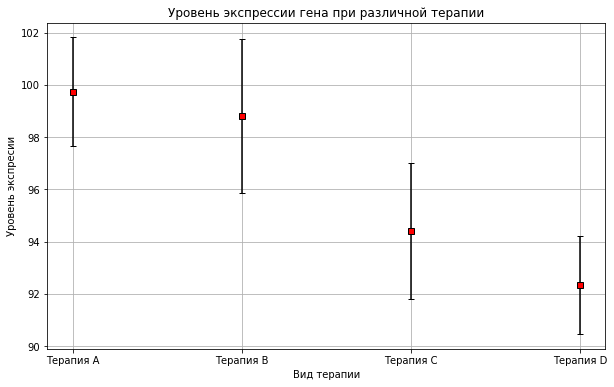

In [70]:
# построение доверительных интервалов
import statistics
from math import sqrt
names = ['Терапия A', 'Терапия B', 'Терапия C', 'Терапия D']

list_mean = [i.mean() for i in terapy_abcd]

list_se = [statistics.stdev(i)/sqrt(len(terapy_abcd)) for i in terapy_abcd]
plt.figure(figsize=(10,6))
plt.errorbar(x=names, y=list_mean, 
             yerr=list_se, color="black",
             capsize=3, marker="s", markersize=6,
             mfc="red", mec="black", fmt = 'o')


plt.title('Уровень экспрессии гена при различной терапии')
plt.grid()
plt.xlabel('Вид терапии')
plt.ylabel('Уровень экспресии')
plt.show()


In [71]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

lm = ols('expr ~ Therapy', data=data_stepik).fit()
table = sm.stats.anova_lm(lm)
print(table)

            df       sum_sq     mean_sq         F    PR(>F)
Therapy    3.0   560.716667  186.905556  8.037302  0.000152
Residual  56.0  1302.266667   23.254762       NaN       NaN


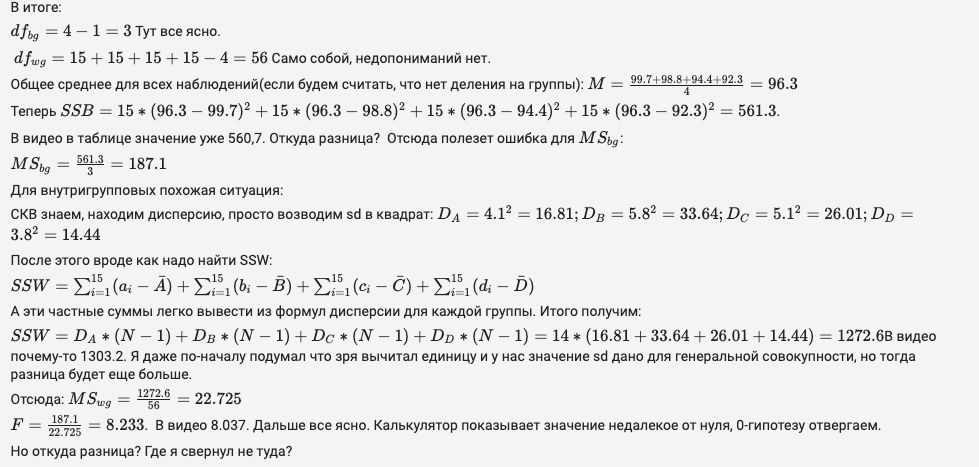

In [72]:
Image(filename='фото//output8.png')

P: 0.00015394953640131303


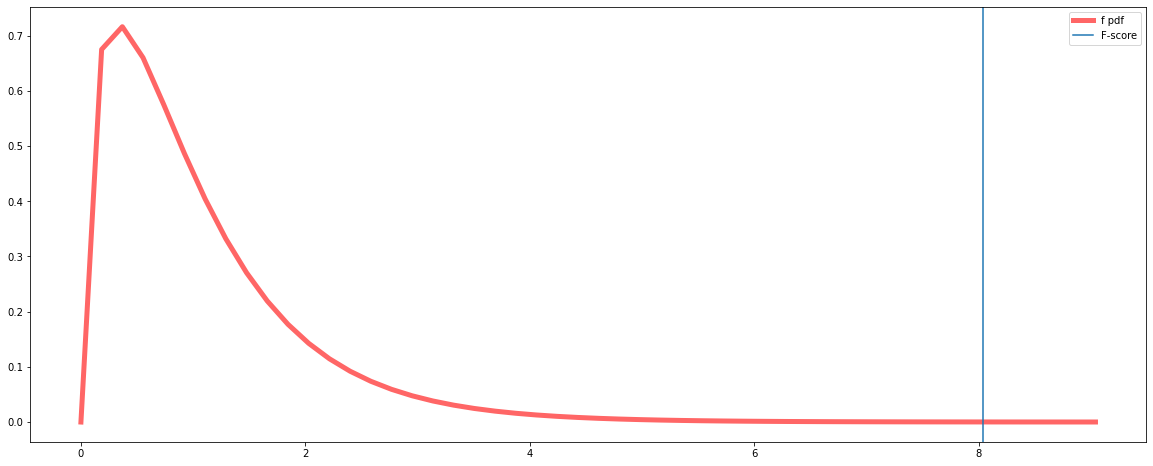

In [73]:
plt.figure(figsize=(20,8))

dfn, dfd = 3,56
x = np.linspace(0, F+1)
plt.plot(x, stats.f.pdf(x, dfn, dfd),'r-', lw=5, alpha=0.6, label='f pdf')
plt.axvline(x=F, label='F-score')
plt.legend()
print("P:", stats.f.pdf(F, dfn, dfd))

<div class="alert alert-warning">
<h2>  Множественные сравнения в ANOVA </h2>
</div> 

Применяя однофакторный дисперсионный анализ, мы можем проверить нулевую гипотезу о том, что все сравниваемые группы происходят из одной генеральной совокупности, и следовательно их средние значения не различаются, т.е. H0 : M1 = M2 = ... = Mi. Если нулевую гипотезу не удается отвергнуть при заданном уровне значимости (например, α = 0.05), в дальнейшем анализе, в принципе, нет необходимости. Но если нулевая гипотеза отвергается, мы делаем заключение о том, что средние значения сравниваемых групп значительно различаются (другими словами, изучаемый фактор оказывает существенное влияние на интересующую нас переменную). Это единственный вывод, который можно сделать при помощи дисперсионного анализа как такового. Однако какие именно группы отличаются друг от друга? Чтобы узнать это, необходимо выполнить попарные сравнения средних значений имеющихся групп.

In [74]:
def pair_t(samples, alpha):
    '''Парный t-критерий, если все выборки равны, возвращает True'''
    n_samples = samples.shape[0]
    # https://ru.wikipedia.org/wiki/Сочетание    
    n_combinations = n_samples*(n_samples - 1)//2
    result = np.zeros(n_combinations, dtype=bool)
    k = 0
    for i in range(n_samples):
        for j in range(i+1, n_samples):
            N = samples[i].size
            std_err = np.sqrt((samples[i].std()**2)/N + (samples[j].std()**2)/N)
            t_value = (samples[i].mean() + samples[j].mean())/std_err
            p = stats.t.sf(t_value, N-2)
            result[k] = p >= alpha
            k += 1
    return np.all(result)

In [75]:
def pair_t_test(repeat, n_samples, sample_size, ax, alpha=0.05):
    '''
    функция показывает, сколько у нас будет ложных результатов, при парном сравнение множества выборок
    с помощью t-критерия
    
    repeat, n_samples, sample_size = количество повторов, количество выборок в каждом повторе, размер выборки
    
    ax - для рисования
    alpha = (1 - (p-уровень значимости))
    '''
    result = np.zeros(repeat, dtype=bool)
    for i in range(repeat):
        samples = random.randn(n_samples, sample_size)
        result[i] = pair_t(samples, alpha)
    
    unique, counts = np.unique(result, return_counts=True)
    percentage = counts/result.size
    ax.pie(percentage, normalize=False, labels=unique, autopct='%.0f%%')

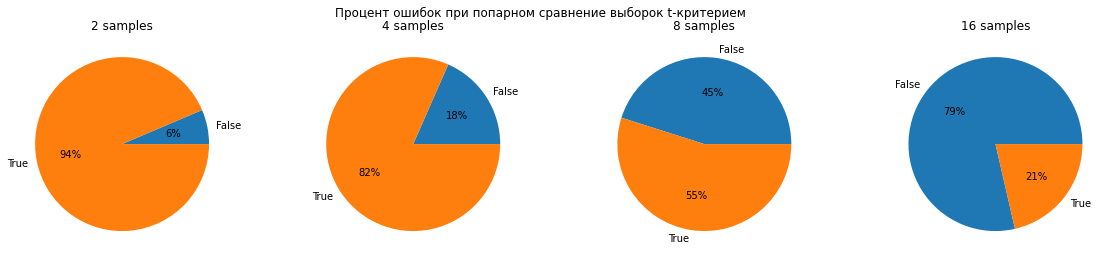

In [76]:
fig, axs = plt.subplots(ncols=4, figsize=(20, 4))
n_samples = [2, 4, 8, 16]
fig.suptitle('Процент ошибок при попарном сравнение выборок t-критерием')

for n, ax in zip(n_samples, axs):
    pair_t_test(1000, n, 100, ax)
    ax.set_title(f'{n} samples')

Как мы и ожидаем, степень ошибки равна **5%**, при сравнение **двух выборок** из одной ГС с помощью t-критерия с p-уровнем значимости **95%**. Если мы возмём **4** выборки, и сравним их попарно, то ошибка возрастёт в **4** раза до **20%**. При **8** выборок, наша ошибка возрасла почти в **9** раз до **46%**. **16** выборок дают увеличение ошибки до **80%** ( в 16 раз), что совершенно неприемлемо.

 Критерий Стьюдента "в чистом виде" для таких сравнений неприменим в силу возникновения эффекта множественных сравнений. Поэтому при множественном попарном сравнении используются поправки.


Поправка Бонферрони (Bonferroni correction)

Если вероятность ошибки первого рода (получить значимые различия там, где их нет) возрастает пропорционально количеству групп, которые мы сравниваем между собой, то допустимый показатель p-уровня значимости (т.е. значение p, ниже которого различия считаются достоверными, обычно α = 0.05) нужно скорректировать на количество всех возможных комбинаций пар из имеющихся групп $С_m ^ 2$ 
Т.е. новый допустимый показатель p-уровня значимости:

$$ α = \frac{p}{С_m^2}$$

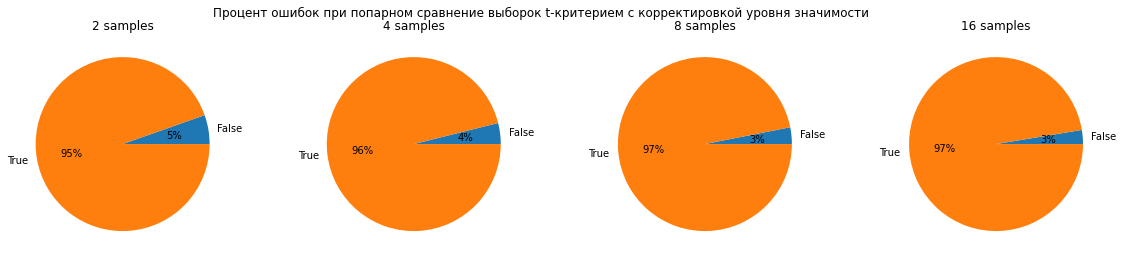

In [77]:
fig, axs = plt.subplots(ncols=4, figsize=(20, 4))
n_samples = [2, 4, 8, 16]
fig.suptitle('Процент ошибок при попарном сравнение выборок t-критерием с корректировкой уровня значимости')

for n, ax in zip(n_samples, axs):
    alpha = 0.05/((n*(n-1))/2)
    pair_t_test(1000, n, 100, ax, alpha)
    ax.set_title(f'{n} samples')

Уменьшаем шанс получить ошибку I рода, но увеличиваем шанс на ошибку II рода)

При наличии большого числа сравниваемых групп метод Бонферрони становится очень консервативным, часто не позволяя отвергнуть даже те гипотезы, которые со всей очевидностью должны быть отвергнуты. Для решения описанной проблемы (т.е. для выполнения большого числа попарных сравнений групповых средних без потери статистической мощности) используется q-критерий Тьюки (Tukey HSD), который представляет собой модифицированный критерий Стьюдента: 
$$q = \frac{X_A - X_B}{SE}$$

Когда все сравниваемые группы содержат одинаковое число наблюдений m: $$ SE = \sqrt{ \frac{MS_{wg}} { m}}$$

Когда сравниваемые группы содержат различное число число наблюдений m: 
$$SE = \sqrt{\frac{MS_{wg }} { 2}* (\frac{1 } { m_A} + \frac{1 } { m_B}  ) }$$
Благодаря тому обстоятельству, что в приведенных выше формулы стандартной ошибки входит внутригрупповая дисперсия MSwg, обеспечивается контроль над групповой вероятностью ошибки первого рода. Именно это делает критерий Тьюки подходящим критерием для выполнения большого числа попарных сравнений групповых средних.

`Критерий Тьюки имеет те же условия применимости, что и дисперсионный анализ:`

 * нормальность распределения данных
 * (особенно важно!) однородность групповых дисперсий (подробнее см. здесь). Для проверки используем тест Левина (если p < 0,05, то проверка пройдена)
Устойчивость к отклонению от этих условий, равно как и статистическая мощность критерия Тьюки, возрастают при одинаковом числе наблюдений во всех сравниваемых группах

[хороший пример](https://www.pythonfordatascience.org/anova-python/)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B  -0.9333    0.9  -5.5961  3.7294  False
     A      C  -5.3333 0.0189  -9.9961 -0.6706   True
     A      D     -7.4  0.001 -12.0628 -2.7372   True
     B      C     -4.4 0.0712  -9.0628  0.2628  False
     B      D  -6.4667 0.0029 -11.1294 -1.8039   True
     C      D  -2.0667 0.6296  -6.7294  2.5961  False
-----------------------------------------------------


/Users/krivonos.no/.local/lib/python3.8/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


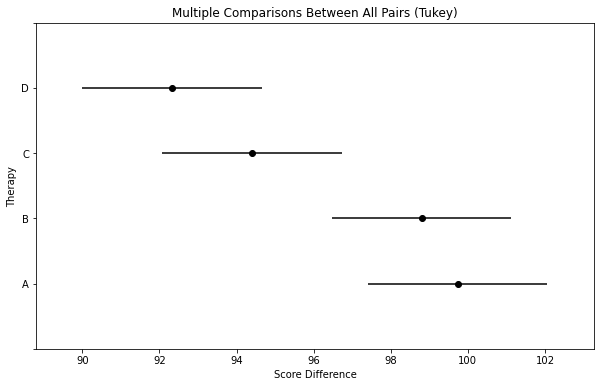

In [78]:
# отрисовка доверительных интервалов для разниц средних
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
data_stepik = pd.read_csv('https://stepik.org/media/attachments/lesson/8083/genetherapy.csv')
MultiComp = MultiComparison(data_stepik['expr'], data_stepik['Therapy'])
post_hoc_res = MultiComp.tukeyhsd()
print(post_hoc_res.summary())

post_hoc_res.plot_simultaneous(ylabel= "Therapy", xlabel= "Score Difference")
ax1.set_xticks(x)
ax1.set_xticklabels(x, rotation="vertical", size=12)
plt.show()

если  reject = True, то  средние не равны (средние значимо отличаются межу собой)

<div class="alert alert-warning">
<h2>  Многофакторный дисперсионный анализ </h2>
</div> 

Формула общей изменчивости:
$$ SST = SSW + SSB_A + SSB_B + SSB_A * SSB_B $$

In [79]:
# реализация с нуля на питоне 
data=pd.read_csv('https://stepik.org/media/attachments/lesson/9250/atherosclerosis.csv', sep=',')

N =  len(data.expr)
m1 = len(data.age.unique())
m2 = len(data.dose.unique())
df_a = m1 - 1
df_b = m2 - 1
df_axb = df_a*df_b 
df_w = N - m1*m2
#Общее среднее
grand_mean = data['expr'].mean()
#Суммы квадратов
ssq_a = sum([(data[data.age ==i].expr.mean()-grand_mean)**2 for i in data.age])
ssq_b = sum([(data[data.dose ==i].expr.mean()-grand_mean)**2 for i in data.dose])
ssq_t = sum((data.expr - grand_mean)**2)
spl_age=[data[data.age == i] for i in data.age.unique()]
age_means=[[x_age[x_age.dose == d].expr.mean() for d in x_age.dose] for x_age in spl_age]
ssq_w = sum([sum((spl_age[i].expr-age_means[i])**2) for i in range(len(data.age.unique()))])
ssq_axb = ssq_t-ssq_a-ssq_b-ssq_w
#Средние квадраты
ms_a = ssq_a/df_a
ms_b = ssq_b/df_b
ms_axb = ssq_axb/df_axb
ms_w = ssq_w/df_w
#F-значения
f_a = ms_a/ms_w
f_b = ms_b/ms_w
f_axb = ms_axb/ms_w
#P-значения
p_a = stats.f.sf(f_a, df_a, df_w)
p_b = stats.f.sf(f_b, df_b, df_w)
p_axb = stats.f.sf(f_axb, df_axb, df_w)
#результаты
results = {'sum_sq':[ssq_a, ssq_b, ssq_axb, ssq_w],
           'df':[df_a, df_b, df_axb, df_w],
           'F':[f_a, f_b, f_axb, 'NaN'],
            'PR(>F)':[p_a, p_b, p_axb, 'NaN']}
columns=['sum_sq', 'df', 'F', 'PR(>F)']
aov_table1 = pd.DataFrame(results, columns=columns,
                          index=['age', 'dose', 
                          'age:dose', 'Residual'])
aov_table1

,sum_sq,df,F,PR(>F)
age,197.452754,1,7.449841,0.008313
dose,16.912241,1,0.638094,0.427552
age:dose,0.927077,1,0.034978,0.852272
Residual,1590.257424,60,NaN,NaN


- Значимый эффект для возроста  F(1, 60) =7.44,  p <0.05
- Не значимый эффект для дозировик F(1, 60) =0.638094,  p >0.05 

<AxesSubplot:xlabel='dose', ylabel='expr'>

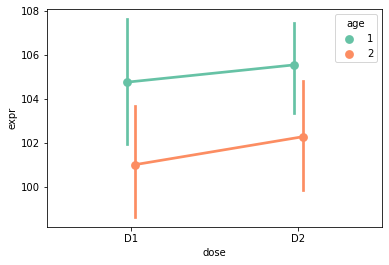

In [80]:
sns.pointplot(x = "dose", y="expr", hue="age",
            data=data, palette="Set2",
            dodge=True,
            kind='point',)

 * Независимо от дозировки среднее значение зеленых доверительных больше , чем оранжевых  = следовательно возраст влияет 
 * средние значения доверительных интервалов дозировок входят в доверительные инетрвалы друг друга = следовательно дозировка не влияет

                     sum_sq    df         F    PR(>F)
C(age)           197.452754   1.0  7.449841  0.008313
C(dose)           16.912241   1.0  0.638094  0.427552
C(age):C(dose)     0.927077   1.0  0.034978  0.852272
Residual        1590.257424  60.0       NaN       NaN


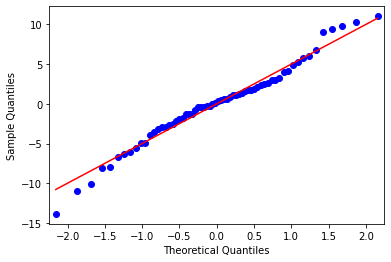

In [81]:
# встроенная функция
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


data_stepik2 = pd.read_csv('https://stepik.org/media/attachments/lesson/9250/atherosclerosis.csv')


formula = 'expr~C(age)+C(dose)+C(age):C(dose)'
model = ols(formula, data_stepik2).fit()
aov_table2 = anova_lm(model, typ=2)

print(aov_table2)


#График:
#import matplotlib.pyplot as plt
res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()

In [82]:
data_stepik2['dose_age'] =  data_stepik2["age"].astype(str) +" - "+ data_stepik2["dose"]

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
1 - D1 1 - D2   0.7874    0.9 -4.0226 5.5974  False
1 - D1 2 - D1  -3.7537 0.1773 -8.5636 1.0563  False
1 - D1 2 - D2  -2.4848 0.5231 -7.2948 2.3251  False
1 - D2 2 - D1  -4.5411 0.0711  -9.351 0.2689  False
1 - D2 2 - D2  -3.2722 0.2847 -8.0822 1.5377  False
2 - D1 2 - D2   1.2688 0.8934 -3.5412 6.0788  False
---------------------------------------------------


/Users/krivonos.no/.local/lib/python3.8/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


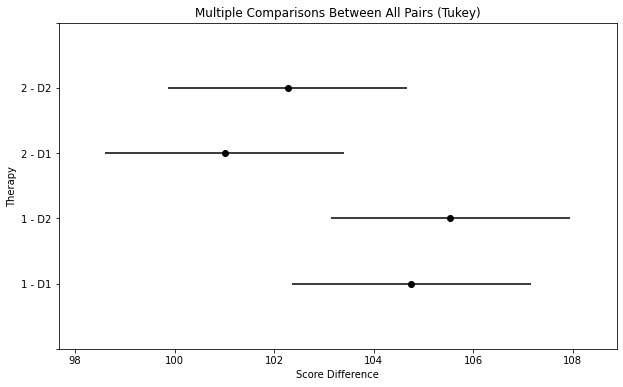

In [83]:
# отрисовка доверительных интервалов для разниц средних
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

MultiComp = MultiComparison(data_stepik2['expr'], data_stepik2['dose_age'] )
post_hoc_res = MultiComp.tukeyhsd()
print(post_hoc_res.summary())

post_hoc_res.plot_simultaneous(ylabel= "Therapy", xlabel= "Score Difference")
ax1.set_xticks(x)
ax1.set_xticklabels(x, rotation="vertical", size=12)
plt.show()

In [84]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

URL = 'https://stepik.org/media/attachments/lesson/9250/birds.csv'
data = pd.read_csv(URL)

formula = 'var4 ~ C(hormone) + C(sex) + C(hormone):C(sex)'
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

                       sum_sq    df         F    PR(>F)
C(hormone)           0.847472   1.0  0.086528  0.769653
C(sex)               0.119762   1.0  0.012228  0.912318
C(hormone):C(sex)   89.483384   1.0  9.136390  0.003682
Residual           587.650394  60.0       NaN       NaN


<AxesSubplot:xlabel='hormone', ylabel='var4'>

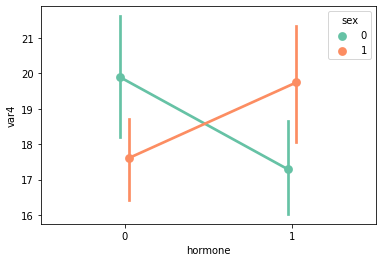

In [85]:
sns.pointplot(x="hormone", y="var4", hue="sex",
                   data=data, palette="Set2",         dodge=True,
            kind='point',)

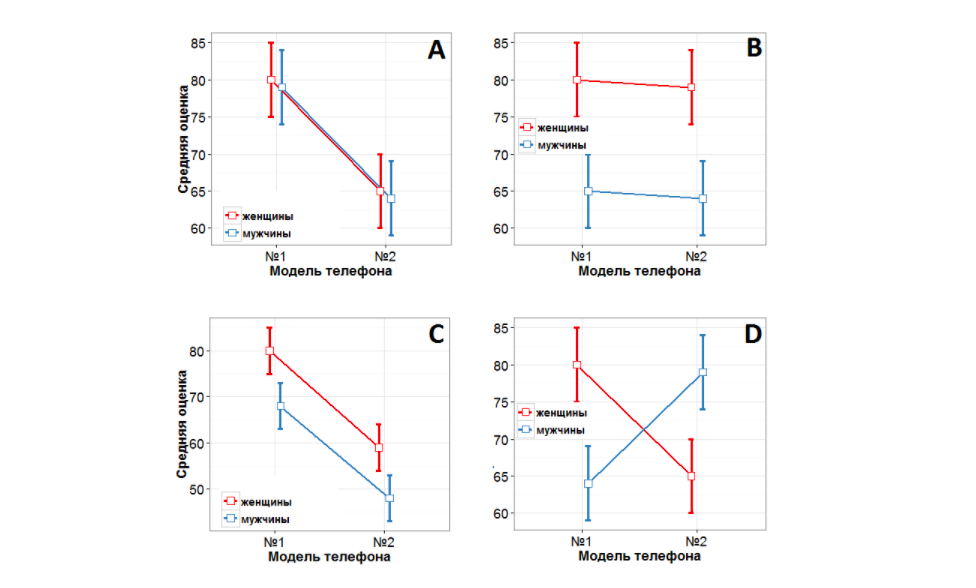

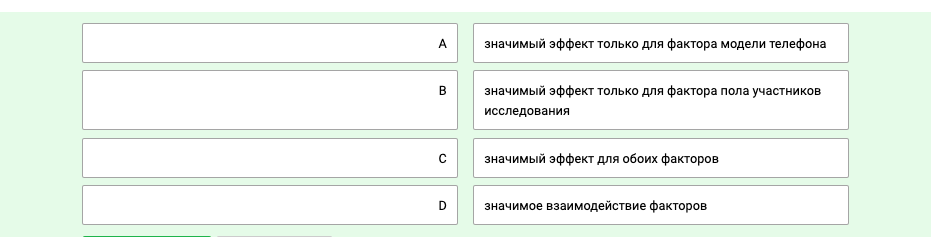

In [86]:
display(Image(filename='фото//output10.png'))
display(Image(filename='фото//output9.png'))

Причиной отклонения нулевой гипотезы в многофакторном дисперсионном анализе (о равенстве средних во всех группах) может стать:
 * Значимый эффект для всех факторов
 * Значимый эффект одного из фактора
 * Значимое взаимодействие факторов

Как проверять гомогенность дисперсии?
 - строим боксплот (он показывает на то, есть ли выбросы)
 - тест левена 

In [87]:
# тест левена 
a = [data_stepik2.query(' dose_age == @i')['expr'] for i in data_stepik2['dose_age'].unique()]

In [88]:
import scipy.stats as stats
group1, group2, group3, group4 = a
#Levene's test centered at the median
print('median')
print(stats.levene(group1, group2, group3, group4 , center='median'))

print('mean')
#Levene's test centered at the mean
print(stats.levene(group1, group2, group3, group4 , center='mean')) 

median
LeveneResult(statistic=0.28003102634798466, pvalue=0.8395982852704241)
mean
LeveneResult(statistic=0.19520719910270906, pvalue=0.8992648225029773)


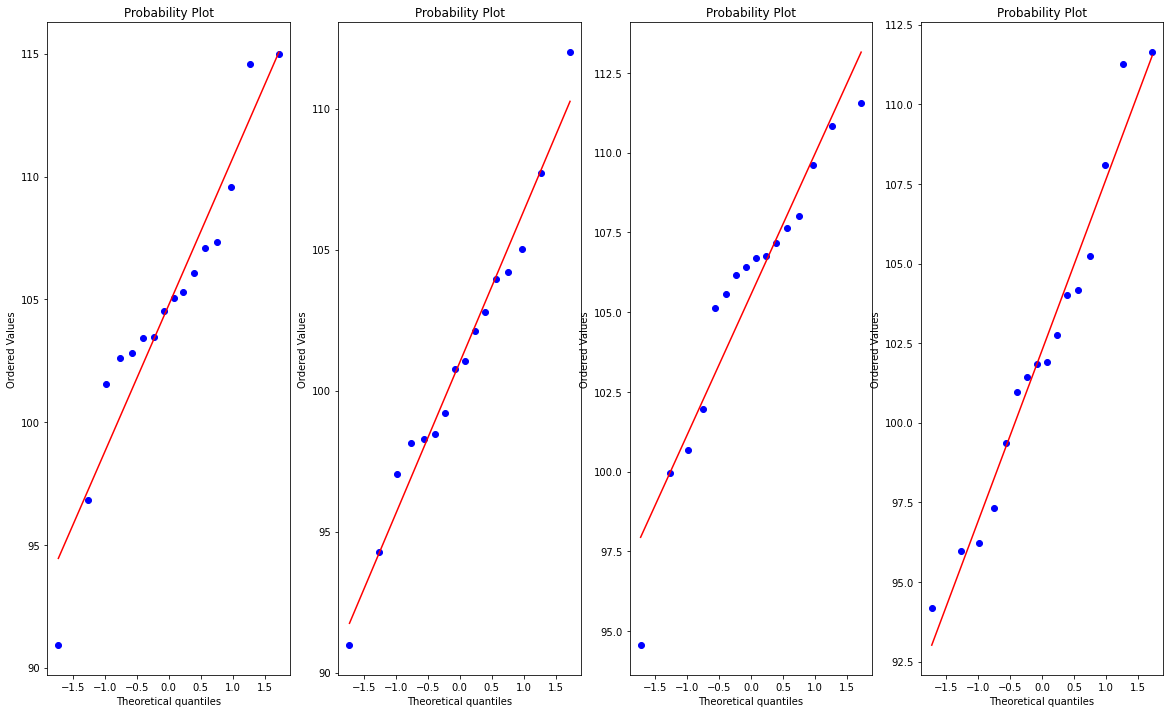

In [89]:
fig, axes = plt.subplots(nrows=1 ,ncols=4, figsize=(20, 12))
for i, ax in zip(a ,axes): 
    stats.probplot(i, plot=ax)